Q1

256


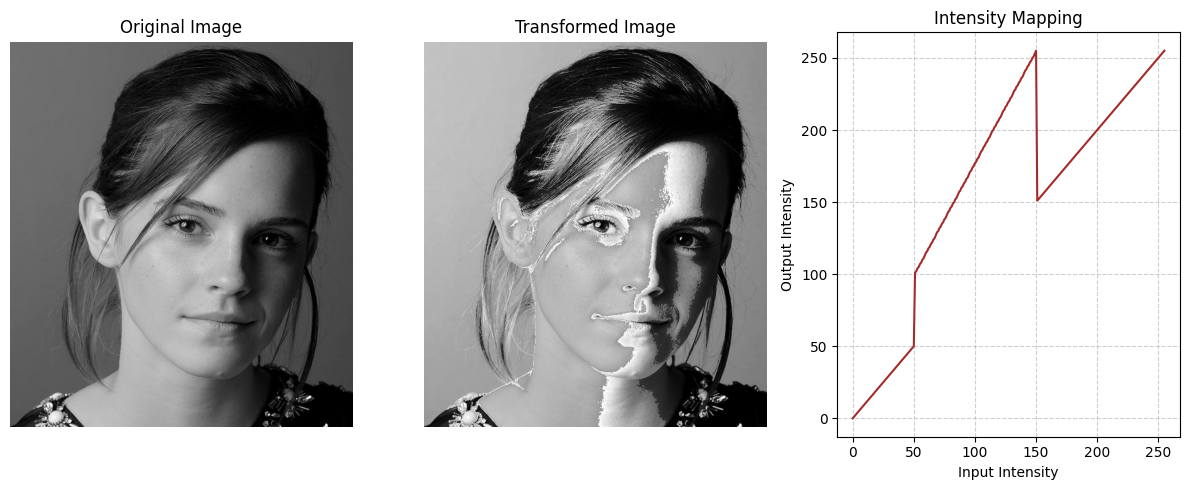

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

c = np.array([(50,100),(150,255)])

t1 = np.linspace(0, c[0,0], c[0,0] +1).astype('uint8')
t2 = np.linspace(c[0,1]+1, c[1,1], c[1,0]-c[0,0]).astype('uint8')
t3 = np.linspace(c[1,0]+1, 255, 255-c[1,0]).astype('uint8')

transform = np.concatenate((t1,t2), axis=0).astype('uint8')
transform = np.concatenate((transform,t3), axis=0).astype('uint8')
print(len(transform))

img_org = cv.imread('emma.jpg',cv.IMREAD_GRAYSCALE)
image_transformed = cv.LUT(img_org, transform)


# Plot results
plt.figure(figsize=(12,5))

# Original image
plt.subplot(1,3,1)
plt.imshow(img_org, cmap="gray")
plt.title("Original Image")
plt.axis("off")

# Transformed image
plt.subplot(1,3,2)
plt.imshow(image_transformed, cmap="gray")
plt.title("Transformed Image")
plt.axis("off")

# Transformation curve
plt.subplot(1,3,3)
plt.plot(np.arange(256), transform, color="brown")
plt.grid(True, linestyle="--", alpha=0.6)
plt.xlabel("Input Intensity")
plt.ylabel("Output Intensity")
plt.title("Intensity Mapping")

plt.tight_layout()
plt.show()

Q2



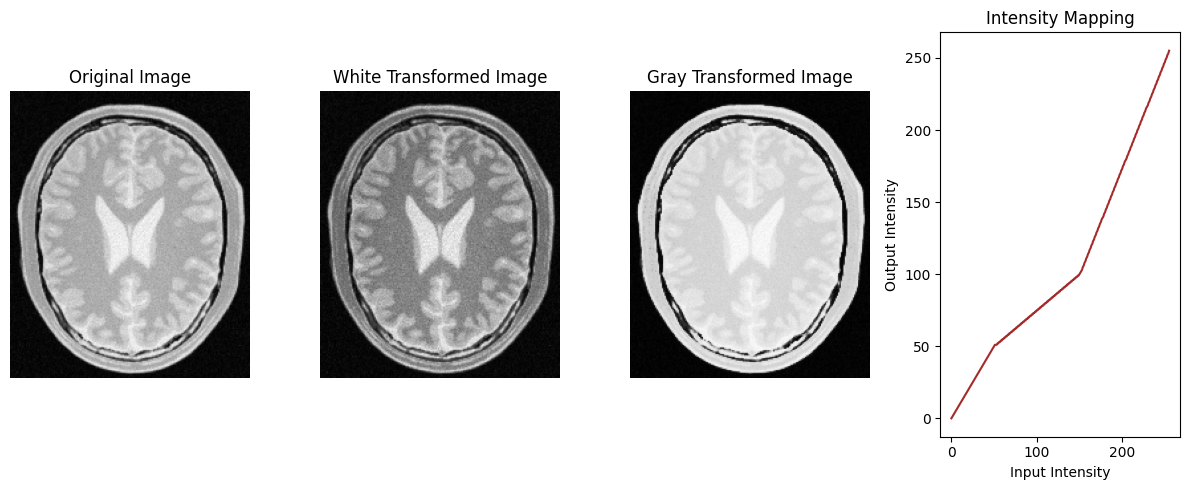

In [6]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# (a) white matter
c = np.array([(50,50), (150,100), (255,255)])
t1 = np.linspace(0, c[0,1], c[0,0]+1).astype('uint8')
t2 = np.linspace(c[0,1]+1, c[1,1], c[1,0]-c[0,0]).astype('uint8')
t3 = np.linspace(c[1,1]+1, c[2,1], c[2,0]-c[1,0]).astype('uint8')
transform = np.concatenate((t1,t2,t3), axis=0).astype('uint8')
# (b) gray matter
gray_c = np.array([(0,0), (80,50), (150,200), (255,255)])
gray_t1 = np.linspace(0, gray_c[1,1], gray_c[1,0]+1).astype('uint8')
gray_t2 = np.linspace(gray_c[1,1]+1, gray_c[2,1], gray_c[2,0]-gray_c[1,0]).astype('uint8')
gray_t3 = np.linspace(gray_c[2,1]+1, gray_c[3,1], gray_c[3,0]-gray_c[2,0]).astype('uint8')
gray_transform = np.concatenate((gray_t1,gray_t2,gray_t3), axis=0).astype('uint8')

img_org = cv.imread('brain_proton_density_slice.png',cv.IMREAD_GRAYSCALE)
image_transformed_white = cv.LUT(img_org, transform)
image_transformed_gray = cv.LUT(img_org, gray_transform)

# Plot results
plt.figure(figsize=(12,5))

# Original image
plt.subplot(1,4,1)
plt.imshow(img_org, cmap="gray")
plt.title("Original Image")
plt.axis("off")

# white Transformed image
plt.subplot(1,4,2)
plt.imshow(image_transformed_white, cmap="gray")
plt.title("White Transformed Image")
plt.axis("off")

# Gray Transformed image
plt.subplot(1,4,3)
plt.imshow(image_transformed_gray, cmap="gray")
plt.title("Gray Transformed Image")
plt.axis("off")

# Transformation curve
plt.subplot(1,4,4)
plt.plot(np.arange(256), transform, color="brown")
plt.xlabel("Input Intensity")
plt.ylabel("Output Intensity")
plt.title("Intensity Mapping")

plt.tight_layout()
plt.show()

Q3

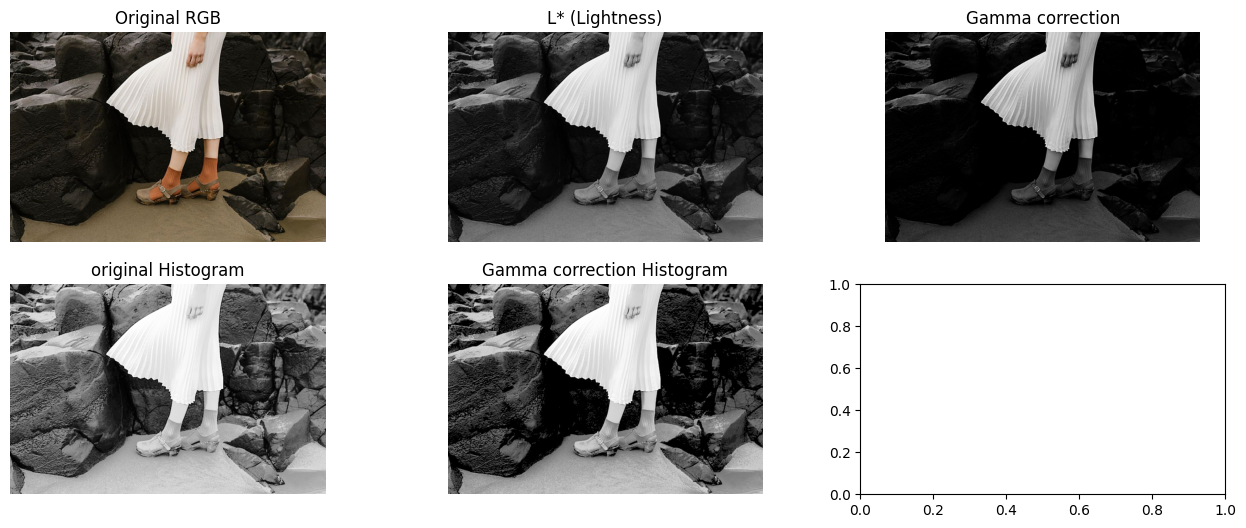

In [11]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread("highlights_and_shadows.jpg")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

lab = cv.cvtColor(img, cv.COLOR_RGB2LAB)
L, a, b = cv.split(lab)

gamma = 2
t = np.array([((i / 255)**gamma)*255 for i in range(0,256)]).astype(np.uint8)
g = t[L]

g_histo = cv.equalizeHist(g)
ori_histo = cv.equalizeHist(L)

fig, axes = plt.subplots(2, 3, figsize=(16, 6))

axes[0,0].imshow(img)
axes[0,0].set_title("Original RGB")
axes[0,0].axis("off")

axes[0,1].imshow(L, cmap="gray")
axes[0,1].set_title("L* (Lightness)")
axes[0,1].axis("off")

axes[0,2].imshow(g, cmap="gray")
axes[0,2].set_title("Gamma correction")
axes[0,2].axis("off")

axes[1,0].imshow(ori_histo, cmap="gray")
axes[1,0].set_title("original Histogram")
axes[1,0].axis("off")

axes[1,1].imshow(g_histo, cmap="gray")
axes[1,1].set_title("Gamma correction Histogram")
axes[1,1].axis("off")

plt.show()


Q4

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2
from skimage import color
import os

img = cv2.imread("spider.png")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img_hsv = color.rgb2hsv(img_rgb)

hue = img_hsv[:, :, 0]
saturation = img_hsv[:, :, 1]
value = img_hsv[:, :, 2]

opt_a = 0.8
sigma=70
enhanced_saturation = np.zeros_like(saturation)

for i in range(saturation.shape[0]):
    for j in range(saturation.shape[1]):
        x = saturation[i, j] * 255
        transformed = x + opt_a * 128 * np.exp(-((x - 128) ** 2) / (2 * sigma ** 2))
        enhanced_saturation[i, j] = min(transformed, 255) / 255

hsv_img = np.stack([hue, saturation, value], axis=2)
rgb_img = color.hsv2rgb(hsv_img)
rgb_img = (rgb_img * 255).astype(np.uint8)

plt.figure(figsize=(15, 10))

# Original image
plt.subplot(2, 2, 1)
plt.imshow(img_rgb )
plt.title('Original Image')
plt.axis('off')

# Enhanced image
plt.subplot(2, 2, 2)
plt.imshow(rgb_img)
plt.title(f'Vibrance Enhanced (a={opt_a})')
plt.axis('off')

# Saturation comparison
# plt.subplot(2, 2, 3)
# plt.imshow(saturation, cmap='hot')
# plt.title('Original Saturation')
# plt.axis('off')
# plt.colorbar()

plt.subplot(2, 2, 4)
plt.imshow(enhanced_saturation, cmap='hot')
plt.title('Enhanced Saturation')
plt.axis('off')
#plt.colorbar()

plt.tight_layout()
plt.show()

x = np.linspace(0, 255, 256)
y = [min(x_val + opt_a * 128 * np.exp(-((x_val - 128) ** 2) / (2 * sigma ** 2)), 255)
    for x_val in x]

plt.figure(figsize=(5, 3))
plt.plot(x, y, 'b-', linewidth=2, label=f'Transformation (a={opt_a})')
plt.plot(x, x, 'r--', linewidth=1, label='Identity')
plt.xlabel('Input Intensity')
plt.ylabel('Output Intensity')
plt.title('Vibrance Intensity Transformation')
plt.grid(True, alpha=0.3)
plt.show()


error: OpenCV(4.12.0) /io/opencv/modules/imgproc/src/color.cpp:199: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


Q5

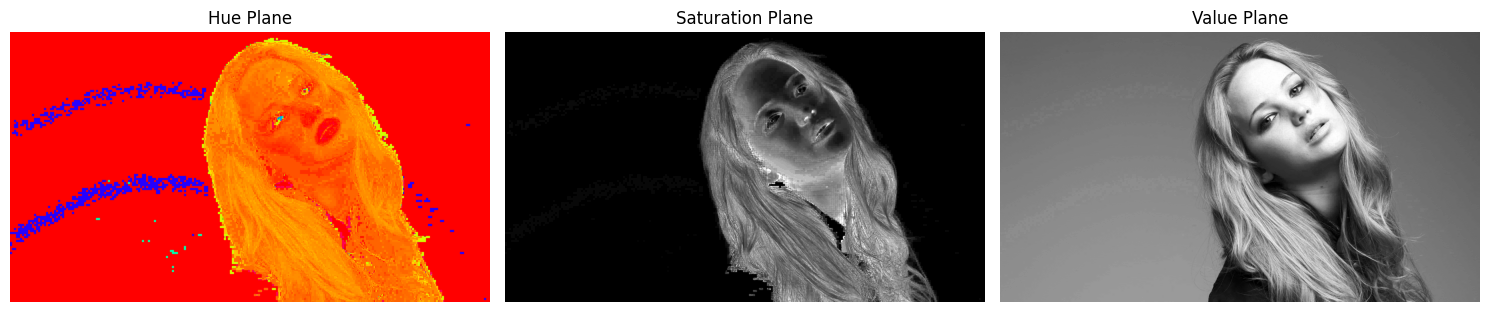

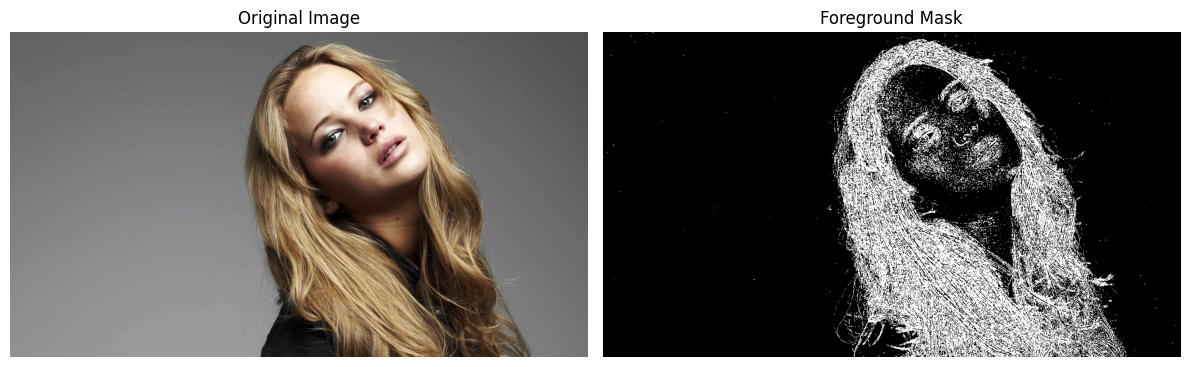

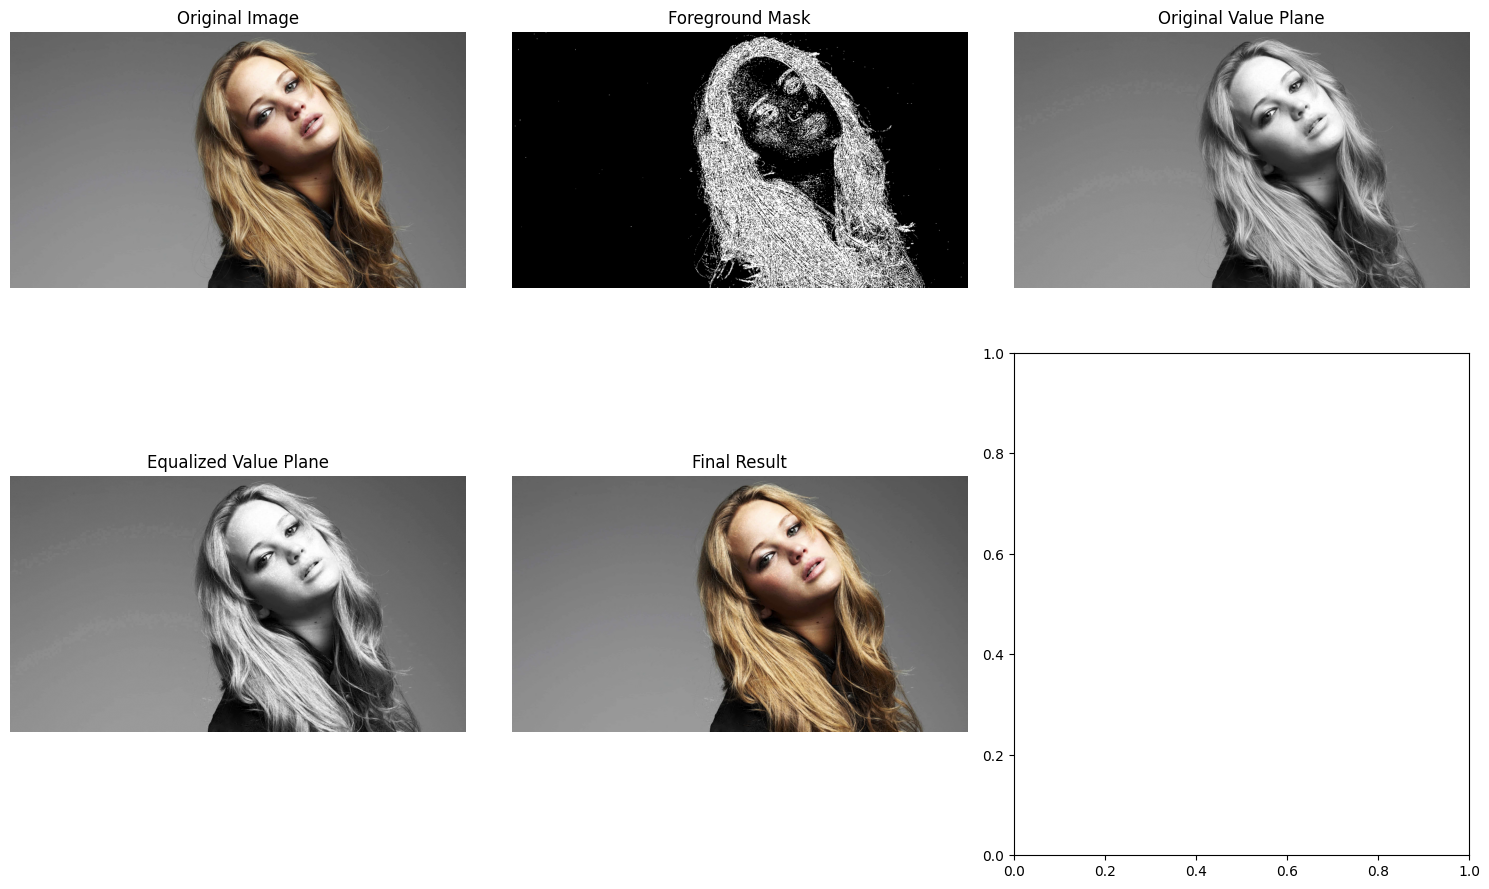

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from skimage import color
from skimage import data
from scipy import ndimage

image = np.array(Image.open('jeniffer.jpg'))
# Convert to RGB
if len(image.shape) == 3 and image.shape[2] == 3:
    img_rgb = image
else:
    img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# (a)
img_hsv = color.rgb2hsv(img_rgb)
hue = img_hsv[:, :, 0]
saturation = img_hsv[:, :, 1]
value = img_hsv[:, :, 2]

# Display HSV planes
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(hue, cmap='hsv')
axes[0].set_title('Hue Plane')
axes[0].axis('off')

axes[1].imshow(saturation, cmap='gray')
axes[1].set_title('Saturation Plane')
axes[1].axis('off')

axes[2].imshow(value, cmap='gray')
axes[2].set_title('Value Plane')
axes[2].axis('off')

plt.tight_layout()
plt.show()

# (b)
val_8bit = (value * 255).astype(np.uint8)

mask = cv2.adaptiveThreshold(val_8bit, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                cv2.THRESH_BINARY, 11, 2)

if np.mean(mask) > 127:
    mask = cv2.bitwise_not(mask)

kernel = np.ones((3, 3), np.uint8)
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)

mask_bool = mask > 0

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].imshow(img_rgb)
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(mask, cmap='gray')
axes[1].set_title('Foreground Mask')
axes[1].axis('off')
plt.tight_layout()
plt.show()

# (c)
foreground_values = val_8bit[mask_bool]

if len(foreground_values) == 0:
    foreground_values = val_8bit.flatten()
    mask_bool = np.ones_like(val_8bit, dtype=bool)

hist, bins = np.histogram(foreground_values, bins=256, range=[0, 255])

# (d)
cdf = np.cumsum(hist)

# (e)
cdf_min = cdf.min()
cdf_max = cdf.max()

if cdf_max - cdf_min > 0:
    cdf_normalized = (cdf - cdf_min) * 255 / (cdf_max - cdf_min)
else:
    cdf_normalized = cdf * 0  # All zeros if no variation

cdf_normalized = cdf_normalized.astype(np.uint8)

value_equalized = val_8bit.copy()
value_equalized[mask_bool] = cdf_normalized[val_8bit[mask_bool]]

value_equalized_normalized = value_equalized.astype(np.float32) / 255.0

# (f)
hsv_equalized = img_hsv.copy()
hsv_equalized[:, :, 2] = value_equalized_normalized
result_rgb = color.hsv2rgb(hsv_equalized)
result_rgb = (result_rgb * 255).astype(np.uint8)

# Display final results
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Row 1
axes[0, 0].imshow(img_rgb)
axes[0, 0].set_title('Original Image')
axes[0, 0].axis('off')

axes[0, 1].imshow(mask, cmap='gray')
axes[0, 1].set_title('Foreground Mask')
axes[0, 1].axis('off')

axes[0, 2].imshow(value, cmap='gray')
axes[0, 2].set_title('Original Value Plane')
axes[0, 2].axis('off')

# Row 2
axes[1, 0].imshow(value_equalized_normalized, cmap='gray')
axes[1, 0].set_title('Equalized Value Plane')
axes[1, 0].axis('off')

axes[1, 1].imshow(result_rgb)
axes[1, 1].set_title('Final Result')
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

Q 6

Color image shape: (380, 364)


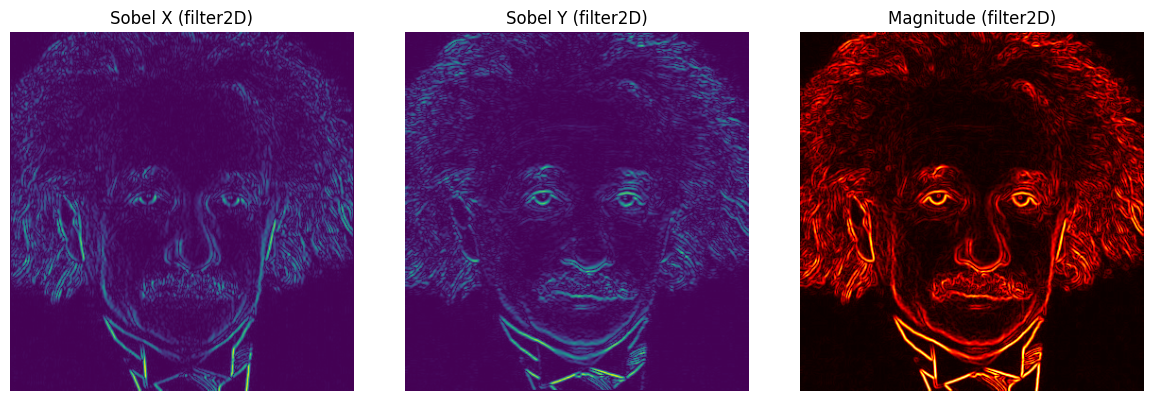

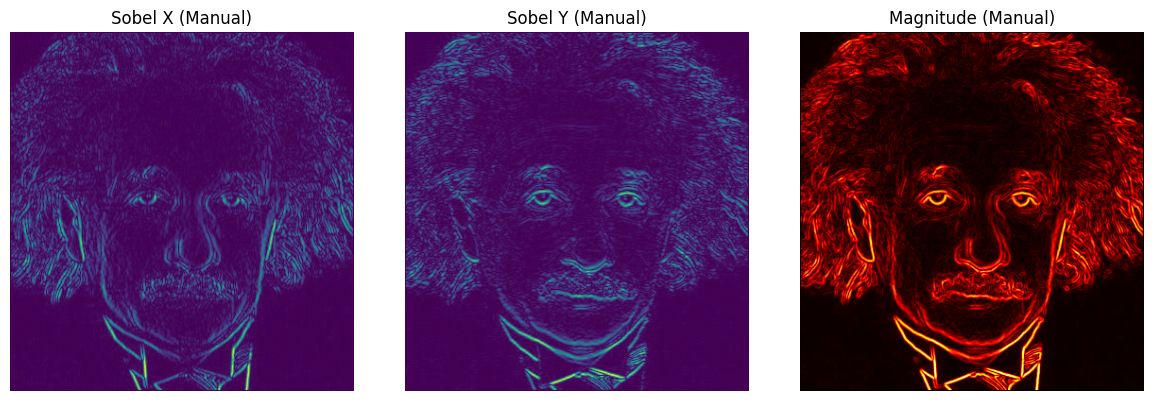

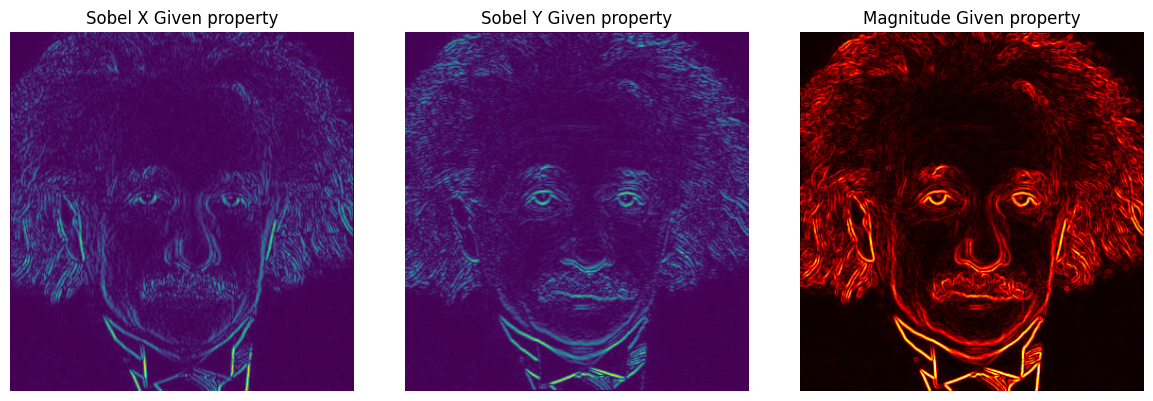

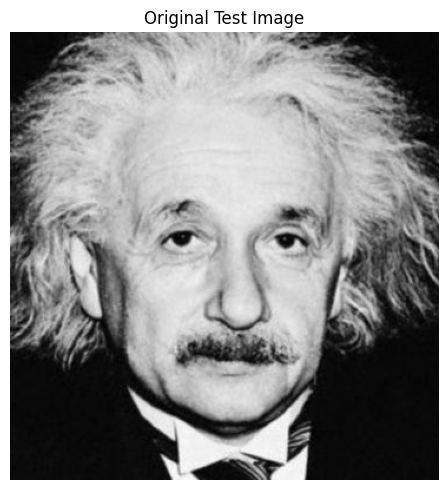

In [ ]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

# (a)
def sobel_filter2d(image):
    sobel_x_kernel = np.array([[-1, 0, 1],
                              [-2, 0, 2],
                              [-1, 0, 1]], dtype=np.float32)

    sobel_y_kernel = np.array([[-1, -2, -1],
                              [0, 0, 0],
                              [1, 2, 1]], dtype=np.float32)

    img_float = image.astype(np.float32) / 255.0
    gx = cv2.filter2D(img_float, cv2.CV_32F, sobel_x_kernel)
    gy = cv2.filter2D(img_float, cv2.CV_32F, sobel_y_kernel)
    magnitude = np.sqrt(gx**2 + gy**2)

    return gx, gy, magnitude

# (b)
def manual_sobel(image):
    sobel_x = np.array([[-1, 0, 1],
                       [-2, 0, 2],
                       [-1, 0, 1]], dtype=np.float32)

    sobel_y = np.array([[-1, -2, -1],
                       [0, 0, 0],
                       [1, 2, 1]], dtype=np.float32)

    img_float = image.astype(np.float32) / 255.0
    h, w = img_float.shape
    gx, gy = np.zeros_like(img_float), np.zeros_like(img_float)

    for i in range(1, h-1):
        for j in range(1, w-1):
            patch = img_float[i-1:i+2, j-1:j+2]
            gx[i, j] = np.sum(patch * sobel_x)
            gy[i, j] = np.sum(patch * sobel_y)

    magnitude = np.sqrt(gx**2 + gy**2)
    return gx, gy, magnitude

# (c)
def sobel_for_given_property(image):
    v_kernel = np.array([1, 2, 1], dtype=np.float32).reshape(3, 1)
    h_kernel = np.array([1, 0, -1], dtype=np.float32).reshape(1, 3)
    sobel_x = np.array([[-1, 0, 1],
                       [-2, 0, 2],
                       [-1, 0, 1]], dtype=np.float32)

    sobel_y = np.array([[-1, -2, -1],
                       [0, 0, 0],
                       [1, 2, 1]], dtype=np.float32)

    gx = cv2.filter2D(image, cv2.CV_32F, sobel_x)
    gy = cv2.filter2D(image, cv2.CV_32F, sobel_y)
    magnitude = np.sqrt(gx**2 + gy**2)

    return gx, gy, magnitude

ori_image = cv.imread('einstein.png',cv.IMREAD_GRAYSCALE)
print(f"Color image shape: {ori_image.shape}")
gx_a, gy_a, mag_a = sobel_filter2d(ori_image)
gx_b, gy_b, mag_b = manual_sobel(ori_image)
gx_c, gy_c, mag_c = sobel_for_given_property(ori_image)

# Display Question (a) results
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(np.abs(gx_a), cmap='viridis')
plt.title('Sobel X (filter2D)')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(np.abs(gy_a), cmap='viridis')
plt.title('Sobel Y (filter2D)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(mag_a, cmap='hot')
plt.title('Magnitude (filter2D)')
plt.axis('off')

plt.tight_layout()
plt.show()

# Display Question (b) results
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(np.abs(gx_b), cmap='viridis')
plt.title('Sobel X (Manual)')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(np.abs(gy_b), cmap='viridis')
plt.title('Sobel Y (Manual)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(mag_b, cmap='hot')
plt.title('Magnitude (Manual)')
plt.axis('off')

plt.tight_layout()
plt.show()

# Display Question (a) results
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(np.abs(gx_c), cmap='viridis')
plt.title('Sobel X Given property')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(np.abs(gy_c), cmap='viridis')
plt.title('Sobel Y Given property')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(mag_c, cmap='hot')
plt.title('Magnitude Given property')
plt.axis('off')

plt.tight_layout()
plt.show()

# Display original image separately
plt.figure(figsize=(5, 5))
plt.imshow(ori_image, cmap='gray')
plt.title('Original Test Image')
plt.axis('off')
plt.tight_layout()
plt.show()

Q 7

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import os

def nearest_neighbor_zoom(image, scale_factor):
    if scale_factor <= 0:
        raise ValueError("Scale factor must be positive")

    h, w = image.shape[:2]
    new_h, new_w = int(h * scale_factor), int(w * scale_factor)
    zoomed = np.zeros((new_h, new_w, image.shape[2]), dtype=image.dtype)
    for i in range(new_h):
        for j in range(new_w):
            orig_i = min(int(i / scale_factor), h - 1)
            orig_j = min(int(j / scale_factor), w - 1)
            zoomed[i, j] = image[orig_i, orig_j]

    return zoomed

def bilinear_interpolation_zoom(image, scale_factor):
    if scale_factor <= 0:
        raise ValueError("Scale factor must be positive")

    h, w = image.shape[:2]
    new_h, new_w = int(h * scale_factor), int(w * scale_factor)

    zoomed = np.zeros((new_h, new_w, image.shape[2]), dtype=image.dtype)

    for i in range(new_h):
        for j in range(new_w):
            # Calculate original coordinates
            x = j / scale_factor
            y = i / scale_factor

            # Get surrounding pixel coordinates
            x1, y1 = int(x), int(y)
            x2, y2 = min(x1 + 1, w - 1), min(y1 + 1, h - 1)

            # Calculate weights
            wx = x - x1
            wy = y - y1

            # Ensure coordinates are within bounds
            x1, y1 = max(0, x1), max(0, y1)
            x2, y2 = min(w - 1, x2), min(h - 1, y2)

            # Bilinear interpolation for each channel
            for c in range(image.shape[2]):
                # Get the four surrounding pixels
                p11 = image[y1, x1, c]
                p21 = image[y1, x2, c]
                p12 = image[y2, x1, c]
                p22 = image[y2, x2, c]

                # Interpolate
                interp = (1 - wx) * (1 - wy) * p11 + \
                          wx * (1 - wy) * p21 + \
                          (1 - wx) * wy * p12 + \
                          wx * wy * p22

                zoomed[i, j, c] = np.clip(interp, 0, 255)
    return zoomed

def normalized_ssd(image1, image2):
    if image1.shape != image2.shape:
        # Resize images to same dimensions
        image2 = cv2.resize(image2, (image1.shape[1], image1.shape[0]))

    # Convert to float for calculation
    img1_float = image1.astype(np.float32)
    img2_float = image2.astype(np.float32)

    # Calculate SSD
    ssd = np.sum((img1_float - img2_float) ** 2)

    # Normalize by number of pixels
    normalized_ssd = ssd / (image1.shape[0] * image1.shape[1])

    return normalized_ssd

def zooming_algorithm(original_path, small_path, scale_factor=4):
    # Load images
    original = np.array(Image.open(original_path))
    small = np.array(Image.open(small_path))

    original_gray = cv2.cvtColor(original, cv2.COLOR_RGB2GRAY)
    small_gray = cv2.cvtColor(small, cv2.COLOR_RGB2GRAY)
    print("here")
    # Zoom small image using both methods
    nn_zoomed = nearest_neighbor_zoom(small_gray, scale_factor)
    print("here 1")
    bilinear_zoomed = bilinear_interpolation_zoom(small_gray, scale_factor)
    print("here 2")
    original_resized = cv2.resize(original_gray, (nn_zoomed.shape[1], nn_zoomed.shape[0]))
    print("here 3")
    nn_ssd = normalized_ssd(original_resized, nn_zoomed)
    bilinear_ssd = normalized_ssd(original_resized, bilinear_zoomed)

    # Display results
    plt.figure(figsize=(20, 10))

    # Original images
    plt.subplot(2, 4, 1)
    plt.imshow(original_gray, cmap='gray')
    plt.title('Original Large Image')
    plt.axis('off')

    plt.subplot(2, 4, 2)
    plt.imshow(small_gray, cmap='gray')
    plt.title('Small Image (Input)')
    plt.axis('off')

    # Nearest neighbor results
    plt.subplot(2, 4, 3)
    plt.imshow(nn_zoomed, cmap='gray')
    plt.title(f'Nearest Neighbor Zoom (4x)\nSSD: {nn_ssd:.2f}')
    plt.axis('off')

    plt.subplot(2, 4, 4)
    diff_nn = np.abs(original_resized.astype(float) - nn_zoomed.astype(float))
    plt.imshow(diff_nn, cmap='hot')
    plt.title('Difference (NN vs Original)')
    plt.axis('off')

    # Bilinear results
    plt.subplot(2, 4, 5)
    plt.imshow(original_resized, cmap='gray')
    plt.title('Original (Resized for Comparison)')
    plt.axis('off')

    plt.subplot(2, 4, 6)
    plt.imshow(bilinear_zoomed, cmap='gray')
    plt.title(f'Bilinear Zoom (4x)\nSSD: {bilinear_ssd:.2f}')
    plt.axis('off')

    plt.subplot(2, 4, 7)
    diff_bilinear = np.abs(original_resized.astype(float) - bilinear_zoomed.astype(float))
    plt.imshow(diff_bilinear, cmap='hot')
    plt.title('Difference (Bilinear vs Original)')
    plt.axis('off')

    # SSD comparison
    plt.subplot(2, 4, 8)
    methods = ['Nearest Neighbor', 'Bilinear']
    ssd_values = [nn_ssd, bilinear_ssd]
    colors = ['red', 'blue']

    bars = plt.bar(methods, ssd_values, color=colors)
    plt.ylabel('Normalized SSD')
    plt.title('SSD Comparison\n(Lower is Better)')

    # Add value labels on bars
    for bar, value in zip(bars, ssd_values):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1,
                f'{value:.2f}', ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

    print(f"Results for {os.path.basename(original_path)}:")
    print(f"Nearest Neighbor SSD: {nn_ssd:.4f}")
    print(f"Bilinear Interpolation SSD: {bilinear_ssd:.4f}")
    print(f"Bilinear is {nn_ssd/bilinear_ssd:.2f}x better" if bilinear_ssd > 0 else "Bilinear is perfect")

    return nn_ssd, bilinear_ssd

# Example usage with multiple test cases
def run_all_tests():
    images = [
        {'original': 'im01.png', 'small': 'im01small.png'},
        {'original': 'im02.png', 'small': 'im02small.png'},
        # Add more test cases as needed
    ]

    results = []

    for i, img in enumerate(images):
        print(f"\n=== Test Case {i+1} ===")
        try:
            nn_ssd, bilinear_ssd = zooming_algorithm(
                img['original'], img['small'], scale_factor=4
            )
            results.append({
                'test_case': i+1,
                'nn_ssd': nn_ssd,
                'bilinear_ssd': bilinear_ssd,
                'improvement_ratio': nn_ssd / bilinear_ssd if bilinear_ssd > 0 else float('inf')
            })
        except Exception as e:
            print(f"Error processing test case {i+1}: {e}")

    # Print summary
    print("\n=== SUMMARY ===")
    for result in results:
        print(f"Test {result['test_case']}: "
              f"NN SSD={result['nn_ssd']:.4f}, "
              f"Bilinear SSD={result['bilinear_ssd']:.4f}, "
              f"Improvement={result['improvement_ratio']:.2f}x")

run_all_tests()

Q 8

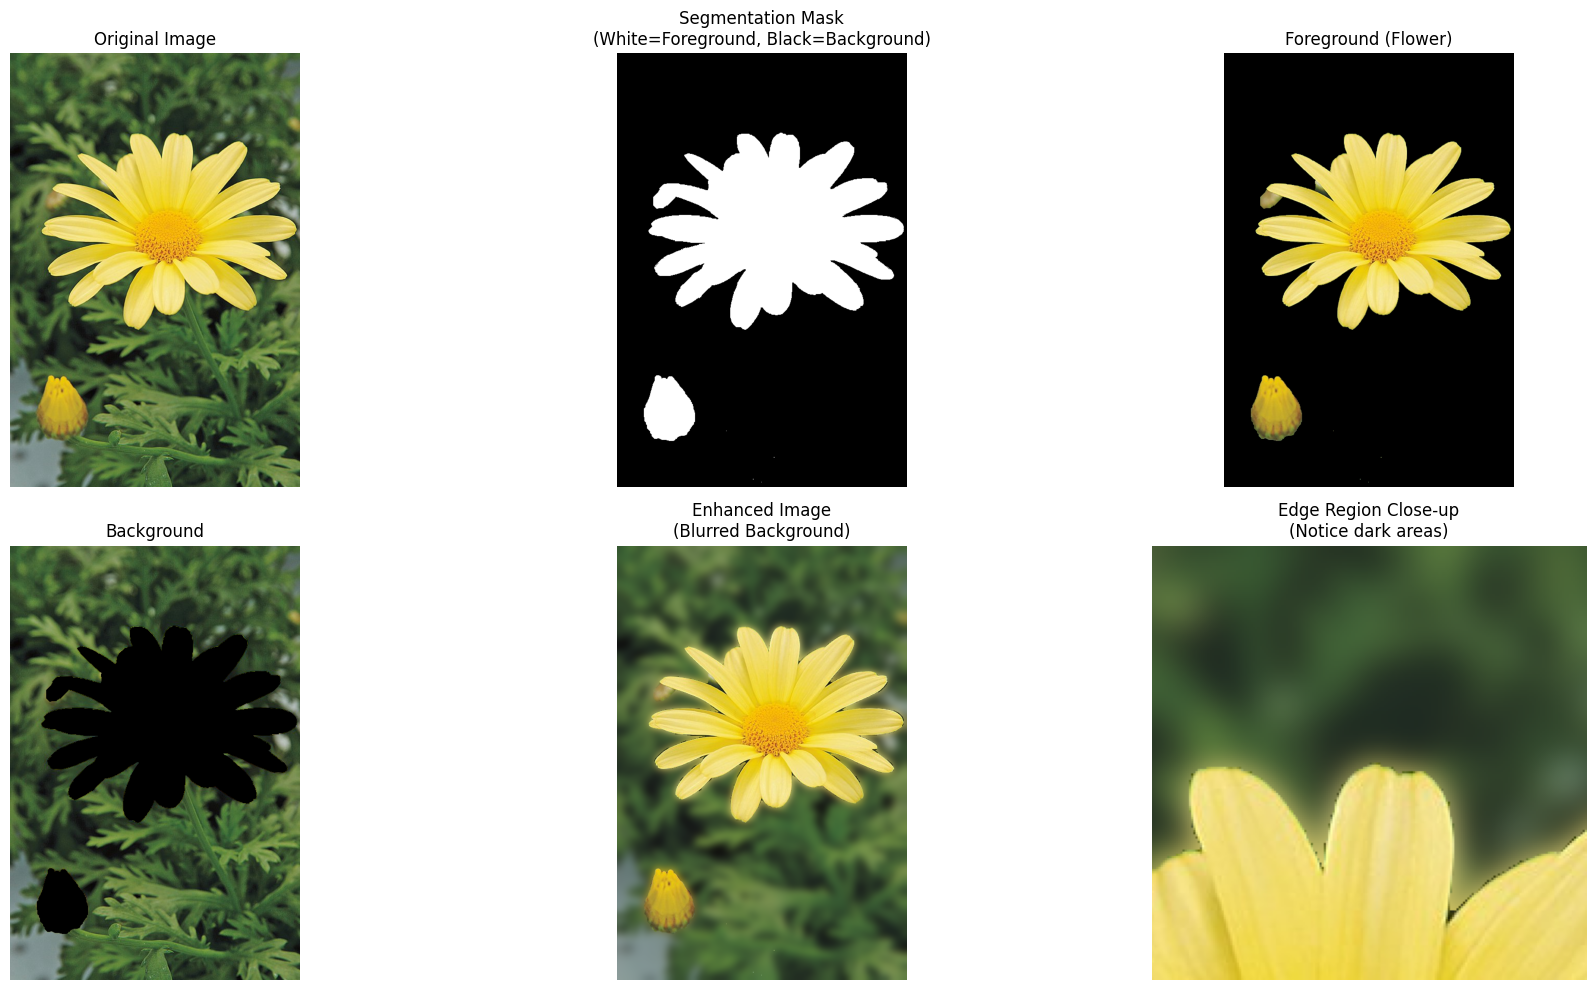


(c) Why is the background just beyond the edge of the flower quite dark?

The darkness around the flower's edge in the enhanced image occurs due to:

1. **Imperfect Segmentation**: GrabCut doesn't create perfect binary masks. The mask has 
   semi-transparent pixels at the boundaries where the algorithm is uncertain.

2. **Alpha Blending Issues**: When we combine the foreground and blurred background using:
      enhanced = foreground + (blurred_bg * (1 - mask))
   
   The mask values at edges are not exactly 0 or 1, but fractional values. This causes:
   - Partial foreground + Partial blurred background = Darker composite

3. **Color Bleeding Prevention**: The darkness helps prevent color bleeding from the blurred 
   background into the foreground, maintaining sharper edges.

4. **Natural Depth Perception**: In real photography, transition zones between in-focus and 
   out-of-focus areas often appear slightly darker, which our visual system interprets as 
   natural depth.

This ef

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image

def grabcut_segmentation(image_path):
    # Load image
    image = cv2.imread("daisy.jpg")
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # (a) GrabCut segmentation
    # Create mask and temporary arrays
    mask = np.zeros(image.shape[:2], np.uint8)
    bgd_model = np.zeros((1, 65), np.float64)
    fgd_model = np.zeros((1, 65), np.float64)

    # Define rectangle around the flower
    height, width = image.shape[:2]
    rect = (50, 50, width-50, height-50)  # (x, y, w, h) - adjust as needed

    # Apply GrabCut
    cv2.grabCut(image, mask, rect, bgd_model, fgd_model, 5, cv2.GC_INIT_WITH_RECT)

    # Create final mask
    final_mask = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')

    # Extract foreground and background
    foreground = image * final_mask[:, :, np.newaxis]
    background = image * (1 - final_mask[:, :, np.newaxis])

    # (b) Enhanced image with blurred background
    # Create blurred background
    blurred_bg = cv2.GaussianBlur(image, (51, 51), 0)

    # Combine original foreground with blurred background
    enhanced_image = foreground + (blurred_bg * (1 - final_mask[:, :, np.newaxis]))

    # Display results
    plt.figure(figsize=(20, 10))

    # Original image
    plt.subplot(2, 3, 1)
    plt.imshow(image)
    plt.title('Original Image')
    plt.axis('off')

    # Segmentation mask
    plt.subplot(2, 3, 2)
    plt.imshow(final_mask, cmap='gray')
    plt.title('Segmentation Mask\n(White=Foreground, Black=Background)')
    plt.axis('off')

    # Foreground image
    plt.subplot(2, 3, 3)
    plt.imshow(foreground)
    plt.title('Foreground (Flower)')
    plt.axis('off')

    # Background image
    plt.subplot(2, 3, 4)
    plt.imshow(background)
    plt.title('Background')
    plt.axis('off')

    # Enhanced image
    plt.subplot(2, 3, 5)
    plt.imshow(enhanced_image)
    plt.title('Enhanced Image\n(Blurred Background)')
    plt.axis('off')

    # Close-up of edge region to show darkness
    plt.subplot(2, 3, 6)
    # Extract a region around the edge
    y, x = np.where(final_mask == 1)
    if len(y) > 0:
        edge_y, edge_x = y[0], x[0]
        crop_size = 100
        crop = enhanced_image[max(0, edge_y-crop_size):min(height, edge_y+crop_size),
                             max(0, edge_x-crop_size):min(width, edge_x+crop_size)]
        plt.imshow(crop)
        plt.title('Edge Region Close-up\n(Notice dark areas)')
        plt.axis('off')

    plt.tight_layout()
    plt.show()

    return image, final_mask, foreground, background, enhanced_image

# Run the function
image_path = 'flower.jpg'
original, mask, foreground, background, enhanced = grabcut_segmentation(image_path)

# (c) Explanation for dark edges
print("\n(c) Why is the background just beyond the edge of the flower quite dark?")
print("""
The darkness around the flower's edge in the enhanced image occurs due to:

1. Imperfect Segmentation: GrabCut doesn’t give a perfect cut-out.
   At the edges, it leaves some semi-transparent pixels where it’s unsure.
2. Alpha Blending Issues: When we combine the subject with the blurred
   background using blending, the mask edges aren’t just 0 or 1 but in-between
   values. This mixes part of the subject with part of the background, making
   the edges look darker

3. Color Bleeding Prevention: The darkness helps prevent color bleeding
   from the blurred background into the foreground, maintaining sharper edges.

4. Natural Depth Perception: In real photos, the areas between sharp and
   blurry parts often look a bit darker, and our eyes see this as a natural sense of depth
""")

Q 9

Q 10

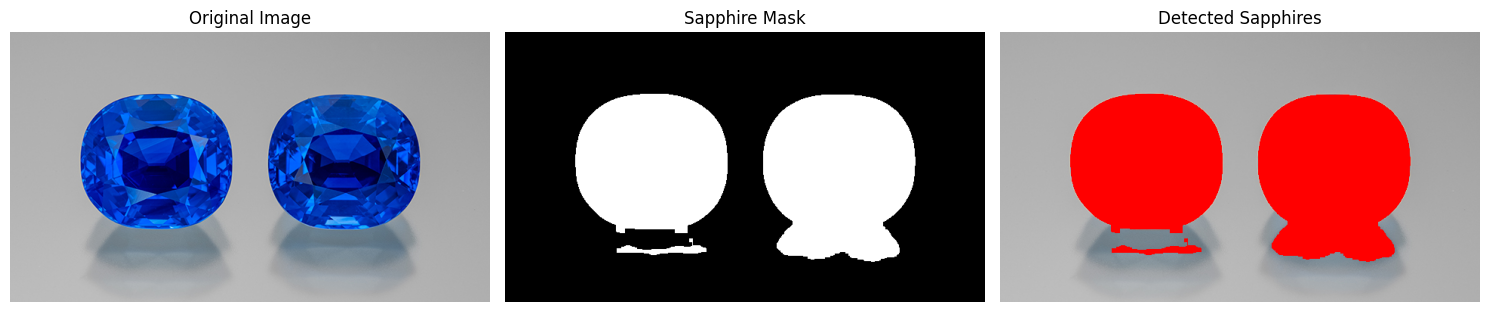

Results:
Number of sapphires detected: 3
Sapphire 1: 30521 pixels² = 0.00 mm²
Sapphire 2: 36250 pixels² = 0.00 mm²
Sapphire 3: 941 pixels² = 0.00 mm²


In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def sapphire_segmentation(image_path):
    # Load and preprocess image
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # (a) Sapphires are blue - use HSV color space
    lower_blue = np.array([90, 50, 50])
    upper_blue = np.array([130, 255, 255])
    blue_mask = cv2.inRange(hsv, lower_blue, upper_blue)

    # Combine with intensity-based thresholding
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    # Combine masks
    combined_mask = cv2.bitwise_or(blue_mask, thresh)

    # (b) Morphological operations
    kernel = np.ones((5, 5), np.uint8)
    cleaned = cv2.morphologyEx(combined_mask, cv2.MORPH_OPEN, kernel)
    filled = cv2.morphologyEx(cleaned, cv2.MORPH_CLOSE, kernel)

    # Fill holes
    contours, _ = cv2.findContours(filled, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    filled_mask = np.zeros_like(filled)
    cv2.drawContours(filled_mask, contours, -1, 255, -1)

    # (c) Connected components
    num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(filled_mask, 8)

    # Filter sapphires (largest components)
    sapphire_mask = np.zeros_like(filled_mask)
    areas = []

    for i in range(1, num_labels):
        if stats[i, cv2.CC_STAT_AREA] > 100:  # Minimum area threshold
            sapphire_mask[labels == i] = 255
            areas.append(stats[i, cv2.CC_STAT_AREA])

    return sapphire_mask, areas, image_rgb

def calculate_real_areas(pixel_areas, focal_length=8, distance=480, sensor_width=6.0, image_width=640):
    pixel_size = (sensor_width * focal_length) / (distance * image_width)
    real_areas = [area * (pixel_size ** 2) for area in pixel_areas]
    return real_areas

# Main execution
mask, pixel_areas, original = sapphire_segmentation('sapphire.jpg')

# Get image dimensions for calibration
image_width = original.shape[1]
real_areas = calculate_real_areas(pixel_areas, image_width=image_width)

# Display results
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(original)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(mask, cmap='gray')
plt.title('Sapphire Mask')
plt.axis('off')

plt.subplot(1, 3, 3)
overlay = original.copy()
overlay[mask == 255] = [255, 0, 0]
plt.imshow(overlay)
plt.title('Detected Sapphires')
plt.axis('off')

plt.tight_layout()
plt.show()

print("Results:")
print(f"Number of sapphires detected: {len(pixel_areas)}")
for i, (px_area, real_area) in enumerate(zip(pixel_areas, real_areas)):
    print(f"Sapphire {i+1}: {px_area} pixels² = {real_area:.2f} mm²")